READ INPUT FILES...
     -> READ MESH DATA FILES...Done!
     -> READ EQUILI DATA FILE...Done!
Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE VACUUM VESSEL FIRST WALL...Done!
     -> APPROXIMATE PLASMA/VACUUM INTERFACE...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> INITIALISE UNKNOWN VECTORS AND COMPUTE INITIAL GUESS...
         -> COMPUTE INITIAL GUESS FOR PHI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL FIRST WALL VALUES PHI_B...Done!
     Done!
Done!


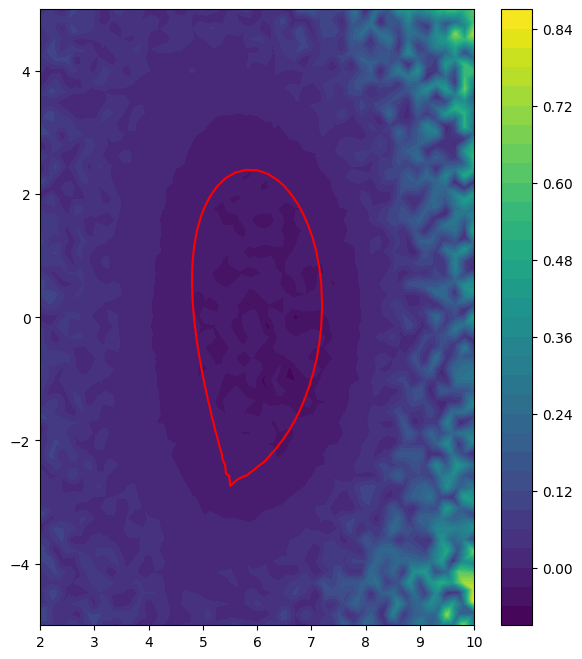

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!


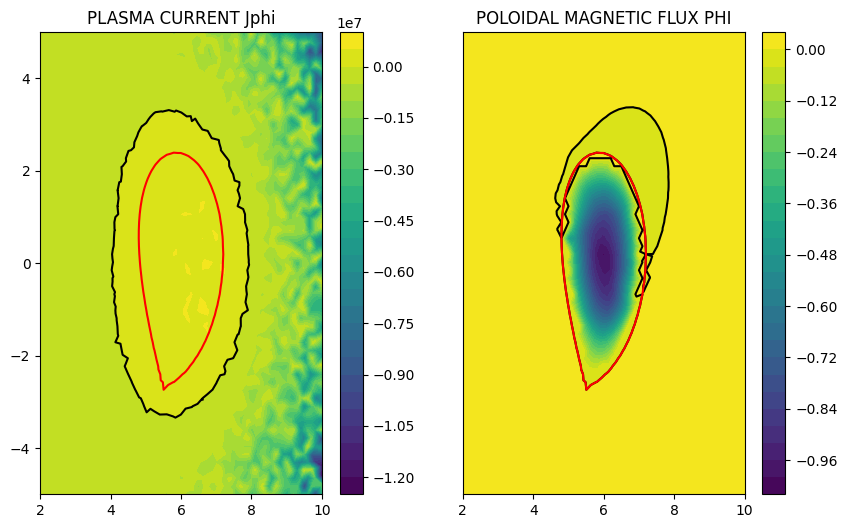

OUTER ITERATION = 1 , INNER ITERATION = 2
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!


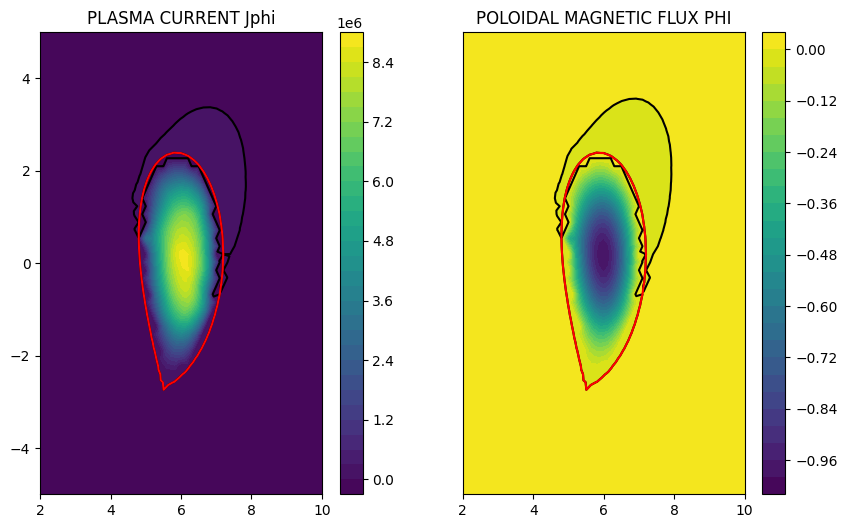

OUTER ITERATION = 1 , INNER ITERATION = 3
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!


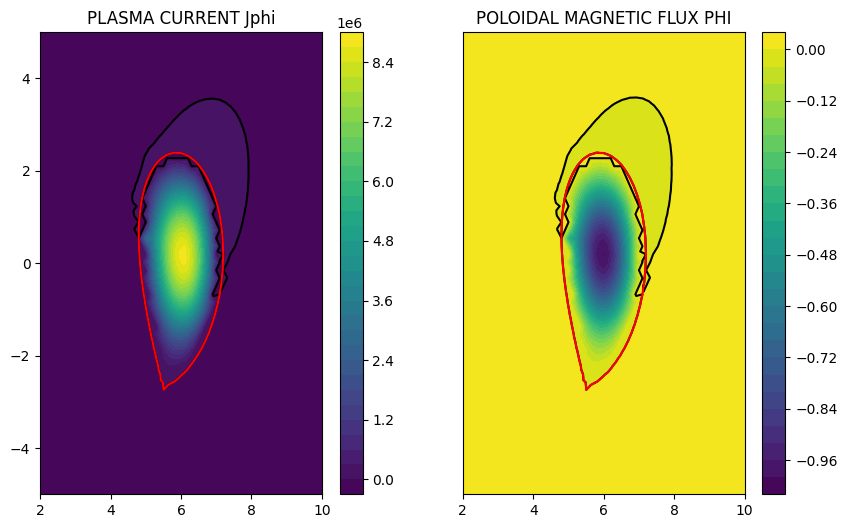

OUTER ITERATION = 1 , INNER ITERATION = 4
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!


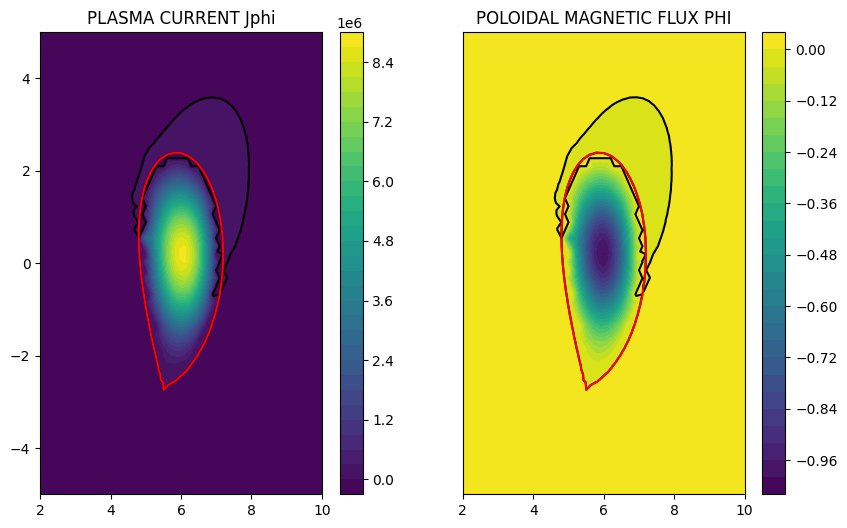

OUTER ITERATION = 1 , INNER ITERATION = 5
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!


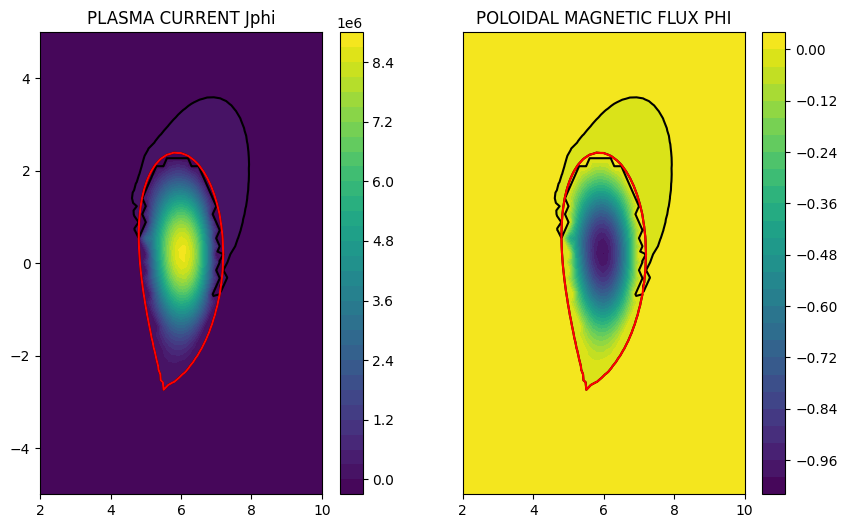

OUTER ITERATION = 1 , INNER ITERATION = 6
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!


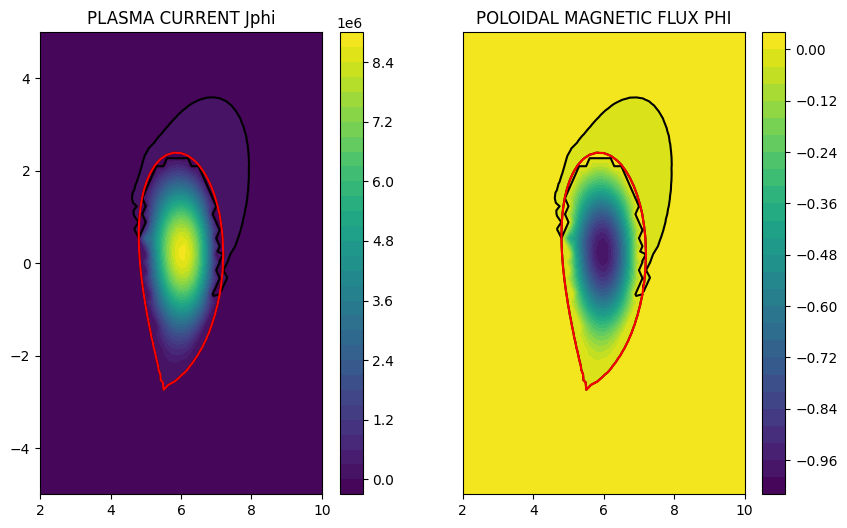

OUTER ITERATION = 1 , INNER ITERATION = 7
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!


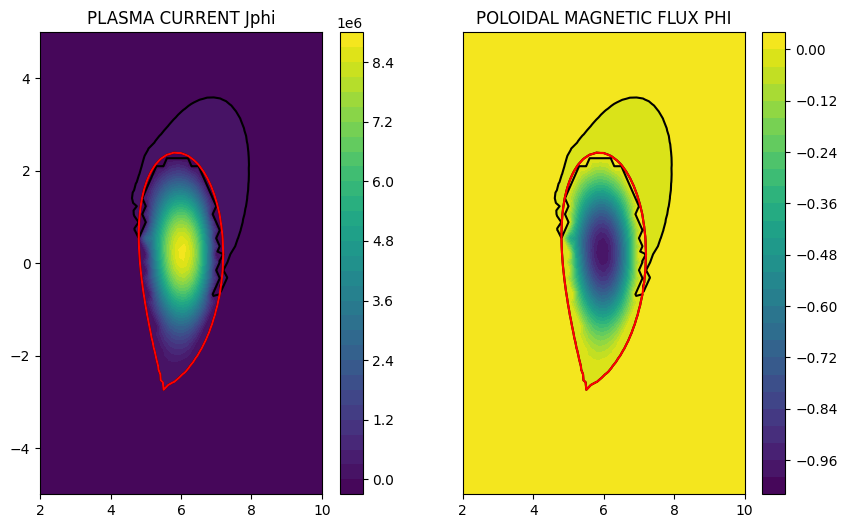

OUTER ITERATION = 1 , INNER ITERATION = 8
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!


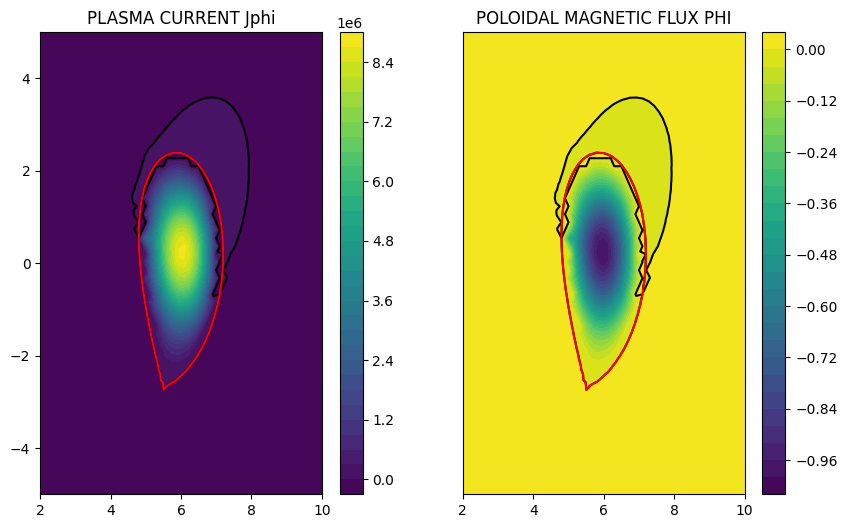

OUTER ITERATION = 1 , INNER ITERATION = 9
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!


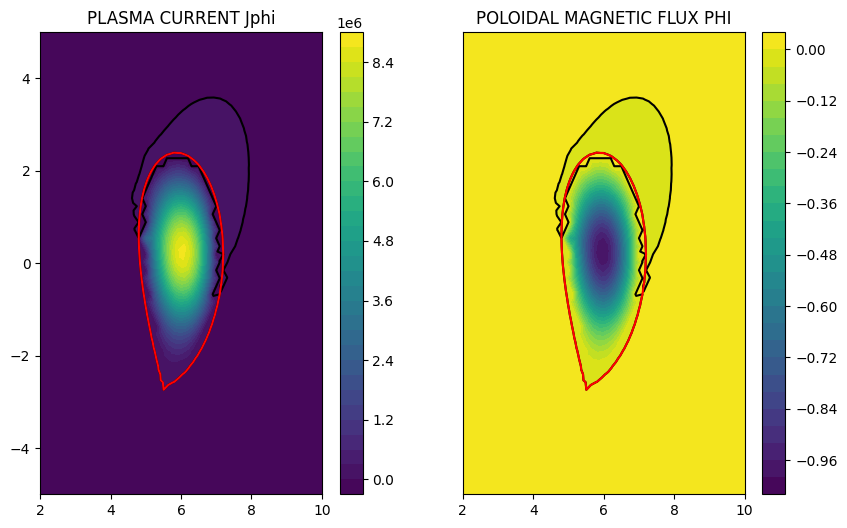

SOLUTION CONVERGED


In [3]:
import sys
sys.path.append('/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/')

from src.GradShafranovCutFEM import *

### LOCATION OF FOLDERS
folder_MESHES = '/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/MESHES/'   # MESHES
folder_CASES = '/home/elmanyer/Documents/BSC/MasterThesis/Code/EQUILI_PY/CASES/'     # CASES

### SELECT MESH FOLDER...
#MESH = 'TS-UNSTRUCTURED_ULTRACOARSE'
#MESH = 'TS-UNSTRUCTURED_COARSE'
#MESH = 'TS-UNSTRUCTURED_COARSE-FINE'
MESH = 'TS-UNSTRUCTURED_FINE'
#MESH = 'TS-UNSTRUCTURED_ULTRAFINE'

# ... WITH MESH ELEMENTS:
ElementType = 1     # Element type -> 1: TRIANGLE  ; 2: QUADRILATERAL
ElementOrder = 1    # Element order -> 1: LINEAR  ; 2: QUADRATIC ; 3: CUBIC ...

### SELECT SOLUTION CASE FILE:
#CASE = 'TS-FIXED-1W-LINEAR'         # FIXED PLASMA BOUNDARY WITH TOKAMAK FIRST WALL PLASMA REGION SHAPE AND LINEAR PLASMA CURRENT MODEL
#CASE = 'TS-FIXED-1W-NONLINEAR'      # FIXED PLASMA BOUNDARY WITH TOKAMAK FIRST WALL PLASMA REGION SHAPE AND NONLINEAR PLASMA CURRENT MODEL
#CASE = 'TS-FIXED-F4E-LINEAR'         # FIXED PLASMA BOUNDARY WITH F4E PLASMA REGION GEOMETRY AND LINEAR PLASMA CURRENT
CASE = 'TS-FIXED-F4E-PROFILES'      # FIXED PLASMA BOUNDARY WITH F4E PLASMA REGION GEOMETRY AND PLASMA CURRENT MODEL BASED ON PROFILES FOR PRESSURE AND TOROIDAL FIELD

# SELECT ORDER OF NUMERICAL INTEGRATION QUADRATURE
QuadratureOrder = 2

##############################################################

# DECLARE OBJECT PROBLEM 
Problem = GradShafranovCutFEM(folder_MESHES+MESH,folder_CASES+CASE,ElementType,ElementOrder,QuadratureOrder)

Problem.EQUILI()


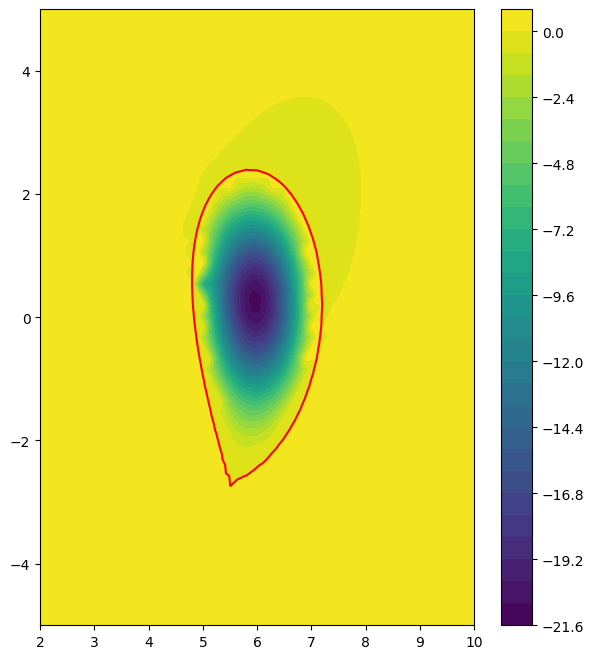

In [6]:
Problem.PlotSolution(Problem.PHI)

In [7]:
print(Problem.PHI_0)

Xcrit = Problem.ComputeCriticalPHI(Problem.PHI)

print(Xcrit)

[-21.19027942]
None


In [ ]:


self = Problem
phi = self.PHI
if len(np.shape(phi)) == 2:
    phi = phi[:,0]
fig, axs = plt.subplots(1, 1, figsize=(7,8))
axs.set_xlim(self.Xmin,self.Xmax)
axs.set_ylim(self.Ymin,self.Ymax)
a = axs.tricontourf(self.X[:,0],self.X[:,1], phi, levels=30)
axs.tricontour(self.X[:,0],self.X[:,1], phi, levels=[0], colors = 'red')
axs.plot(Xcrit[0],Xcrit[1],'x',color='black')
plt.colorbar(a, ax=axs)
plt.show()
